# Lab | Pandas Deep-Dive

### 1. Import Pandas package under the alias pd and Numpy under the alias np

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
% matplotlib inline 

In [17]:
%pprint

Pretty printing has been turned OFF


### 2. Define a variable called `path` that contains the path to the csv file you downloaded. 

In [5]:
# Why do I have to take aways the "s" from the end of the http path?
path="http://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/apple_store.csv"

### 3. Using the Pandas `read_csv()` method, import the csv file at the path above. 

Assign the returned value to a variable called `data`.

Note: you can omit the `sep` parameter for `read_csv()` because the csv file uses the default separator of ",".

In [8]:
data = pd.read_csv(path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 9 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
prime_genre         7197 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 506.2+ KB


### 4. Print the first 5 rows of `data` to see what the data look like.

A data analyst usually does this to have a general understanding about what the data look like before digging deep.

In [10]:
data.head()

,id,track_name,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,prime_genre
0,281656475,PAC-MAN Premium,100788224,3.99,21292,26,4.0,4.5,Games
1,281796108,Evernote - stay organized,158578688,0.00,161065,26,4.0,3.5,Productivity
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,0.00,188583,2822,3.5,4.5,Weather
3,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,0.00,262241,649,4.0,4.5,Shopping
4,282935706,Bible,92774400,0.00,985920,5320,4.5,5.0,Reference


### 5. Print the summary (info) of the data.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 9 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
prime_genre         7197 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 506.2+ KB


### 6. Print the number of columns in the data.

In [13]:
len(data.columns)

9

### 7. Print all column names.

In [12]:
data.columns

Index(['id', 'track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'prime_genre'],
      dtype='object')

## Now that we have a general understanding of the data, we'll start working on the challenge questions.

### 8. How many apps are there in the data source? 

Print the # of observations of the data.

*Hint: Your code should return the number 7197.*

In [14]:
len(data)

7197

### 9. What is the average rating of all apps? 

First, read the `user_rating` column into a varialbe named `user_rating`.

In [20]:
user_rating = data['user_rating']

Now you can calculate the average of the `user_rating` data.

Your code should return 3.526955675976101

In [22]:
user_rating.mean()

3.526955675976101

### 10. How many apps have an average rating no less than 4?

First, filter `user_rating` where its value >= 4. 

Assign the filtered dataframe to a new variable called `user_rating_high`.

In [24]:
user_rating_high = data[data['user_rating'] >= 4]

Now obtain the length of `user_rating_high` which should return 4781.

In [25]:
len(user_rating_high)

4781

### 11. How many genres are there in total for all the apps?

Define a new variable named `genres` that contains the `prime_genre` column of `data`. Google for how to obtain unique values of a dataframe column. 

In [33]:
genres = data[['prime_genre']]
genres

,prime_genre
0,Games
1,Productivity
2,Weather
3,Shopping
4,Reference
...,...
7192,Games
7193,Games
7194,Utilities
7195,Games


Print the length of the unique values of `genres`. Your code should return 23.

In [28]:
len(genres.unique())

23

### 12. What are the top 3 genres that have the most number of apps?

What you want to do is to count the number of occurrences of each unique genre values. Because you already know how to obtain the unique genre values, you can of course count the # of apps of each genre one by one. However, Pandas has a convient function to let you count all values of a dataframe column with a single command. Google for "pandas count values" to find the solution. Your code should return the following:

```
Games            3862
Entertainment     535
Education         453
Name: prime_genre, dtype: int64
```

In [47]:
genresCount = genres['prime_genre'].value_counts()
genresCount[:3]

Games            3862
Entertainment     535
Education         453
Name: prime_genre, dtype: int64

### 13. Which genre is most likely to contain free apps?

First, filter `data` where the price is 0.00. Assign the filtered data to a new variable called `free_apps`. Then count the values in `free_apps`. Your code should return:

```
Games                2257
Entertainment         334
Photo & Video         167
Social Networking     143
Education             132
Shopping              121
Utilities             109
Lifestyle              94
Finance                84
Sports                 79
Health & Fitness       76
Music                  67
Book                   66
Productivity           62
News                   58
Travel                 56
Food & Drink           43
Weather                31
Navigation             20
Reference              20
Business               20
Catalogs                9
Medical                 8
Name: prime_genre, dtype: int64
```

In [50]:
freeApps = data[data['price']==0]
freeAppsGenre = freeApps.prime_genre.value_counts()
freeAppsGenre

Games                2257
Entertainment         334
Photo & Video         167
Social Networking     143
Education             132
Shopping              121
Utilities             109
Lifestyle              94
Finance                84
Sports                 79
Health & Fitness       76
Music                  67
Book                   66
Productivity           62
News                   58
Travel                 56
Food & Drink           43
Weather                31
Navigation             20
Business               20
Reference              20
Catalogs                9
Medical                 8
Name: prime_genre, dtype: int64

### 14. Now you can calculate the proportion of the free apps in each genre based on the value counts you obtained in the previous two steps. 

Challenge yourself by achieving that with one line of code. The output should look like:

```
Shopping             0.991803
Catalogs             0.900000
Social Networking    0.856287
Finance              0.807692
News                 0.773333
Sports               0.692982
Travel               0.691358
Food & Drink         0.682540
Lifestyle            0.652778
Entertainment        0.624299
Book                 0.589286
Games                0.584412
Music                0.485507
Photo & Video        0.478510
Utilities            0.439516
Navigation           0.434783
Weather              0.430556
Health & Fitness     0.422222
Business             0.350877
Productivity         0.348315
Medical              0.347826
Reference            0.312500
Education            0.291391
Name: prime_genre, dtype: float64
```

The numbers are interesting, aren't they?

In [53]:
# Just divide pandas series created in the previous two steps
(freeAppsGenre/genresCount).sort_values(ascending=False)

Shopping             0.991803
Catalogs             0.900000
Social Networking    0.856287
Finance              0.807692
News                 0.773333
Sports               0.692982
Travel               0.691358
Food & Drink         0.682540
Lifestyle            0.652778
Entertainment        0.624299
Book                 0.589286
Games                0.584412
Music                0.485507
Photo & Video        0.478510
Utilities            0.439516
Navigation           0.434783
Weather              0.430556
Health & Fitness     0.422222
Business             0.350877
Productivity         0.348315
Medical              0.347826
Reference            0.312500
Education            0.291391
Name: prime_genre, dtype: float64

### 15. If a developer tries to make money by developing and selling Apple Store apps, in which genre should s/he develop the apps? Please assume all apps cost the same amount of time and expense to develop.

We will leave this question to you. There are several way to solve it. Ideally your output should look like below:

```
    average_price              genre
21       8.776087            Medical
11       5.116316           Business
4        4.836875          Reference
6        4.835435              Music
1        4.330562       Productivity
15       4.124783         Navigation
16       4.028234          Education
12       1.916444   Health & Fitness
20       1.790536               Book
7        1.647621          Utilities
2        1.605417            Weather
18       1.552381       Food & Drink
14       1.473295      Photo & Video
0        1.432923              Games
8        1.120370             Travel
10       0.953070             Sports
13       0.889701      Entertainment
17       0.885417          Lifestyle
22       0.799000           Catalogs
19       0.517733               News
5        0.421154            Finance
9        0.339880  Social Networking
3        0.016311           Shopping
```

In [70]:
# See what the average price is in each genre
priceGenre = data.groupby('prime_genre')['price'].mean().sort_values(ascending=False)
priceGenre

prime_genre
Medical              8.776087
Business             5.116316
Reference            4.836875
Music                4.835435
Productivity         4.330562
Navigation           4.124783
Education            4.028234
Health & Fitness     1.916444
Book                 1.790536
Utilities            1.647621
Weather              1.605417
Food & Drink         1.552381
Photo & Video        1.473295
Games                1.432923
Travel               1.120370
Sports               0.953070
Entertainment        0.889701
Lifestyle            0.885417
Catalogs             0.799000
News                 0.517733
Finance              0.421154
Social Networking    0.339880
Shopping             0.016311
Name: price, dtype: float64

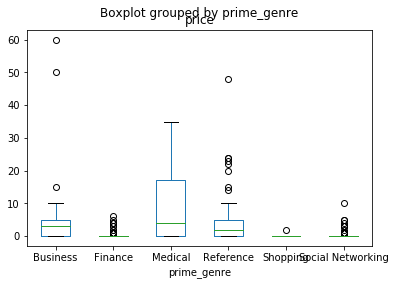

In [79]:
data[data['prime_genre'].isin(["Medical", "Business", "Reference","Finance","Social Networking","Shopping"])].boxplot(by ='prime_genre', column =['price'], grid = False)

From the boxplot above, which show the top 3 and bottom 3 genres. Yes, we can see the the medical category has the highest prices. However 50% of the obsevations more or less are about tied with apps in the Business category.